# **ANALISIS EFISIENSI KONSUMSI BAHAN BAKAR**

**Disusun oleh Kelompok 19 2024D:**

Kevin Febrian Widhiarta(24031554025)

Davan Juheins Tololiu (24031554157)

In [63]:
import pandas as pd
import numpy as np

**Import Data CSV**

In [64]:
FILE_KENDARAAN = 'vehicles.csv'
FILE_HARGA_MINYAK = 'wti_oil_prices.csv'
FILE_HARGA_BENSIN = 'retail_gasoline_prices.csv'

try:
    df_kendaraan = pd.read_csv(FILE_KENDARAAN, low_memory=False)
    print("Data Kendaraan Dimuat:", df_kendaraan.shape)
except Exception as e:
    print(f"Error loading Data Kendaraan: {e}")

try:
    df_minyak_bumi = pd.read_csv(FILE_HARGA_MINYAK)
    print("\nData Harga Minyak mentah Dimuat:", df_minyak_bumi.shape)
except Exception as e:
    print(f"Error loading Data Harga Minyak: {e}")

try:
    df_bensin = pd.read_csv(FILE_HARGA_BENSIN, sep=';', skiprows=4)
    print(f"\nData Harga Bensin Dimuat: {df_bensin.shape}")
except Exception as e:
    print(f"Error loading Data Harga Bensin: {e}")

Data Kendaraan Dimuat: (49582, 84)

Data Harga Minyak mentah Dimuat: (2081, 7)

Data Harga Bensin Dimuat: (371, 1)


**Cleaning Data**

Data Kendaraan

In [65]:
# Penanganan Missing Values dan Standardisasi/Konversi Satuan
if 'df_kendaraan' in locals() or 'df_kendaraan' in globals():
    print("df_kendaraan DataFrame found.")
    print("Columns in df_kendaraan:", df_kendaraan.columns.tolist())

    df_kendaraan_to_clean = df_kendaraan.copy()
    cols_to_keep = ['year', 'make', 'model', 'hpv', 'comb08', 'co2']

    missing_cols = [col for col in cols_to_keep if col not in df_kendaraan_to_clean.columns]
    if missing_cols:
        print(f"Error: The following columns are missing from df_kendaraan: {missing_cols}")
    else:
        df_kendaraan_clean = df_kendaraan_to_clean[cols_to_keep].dropna(subset=['hpv']).copy()

        # MPG (Miles Per Gallon) ke km/Liter (1 mil = 1.60934 km, 1 galon = 3.78541 liter)
        KONVERSI_MPG_TO_KML = 0.425143707
        df_kendaraan_clean['Efficiency_km/L'] = df_kendaraan_clean['comb08'] * KONVERSI_MPG_TO_KML

        df_kendaraan_clean.drop(columns=['comb08', 'co2'], inplace=True)
        df_kendaraan_clean = df_kendaraan_clean[(df_kendaraan_clean['year'] >= 2016) & (df_kendaraan_clean['year'] <= 2025)].copy()
else:
    print("df_kendaraan DataFrame not found. Please run the data loading cell first.")

df_kendaraan_clean

df_kendaraan DataFrame found.
Columns in df_kendaraan: ['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'baseModel', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop', 'phevCity', '

,year,make,model,hpv,Efficiency_km/L
28531,2016,Mazda,6,0,12.754311
28532,2016,Mazda,6,0,13.604599
28533,2016,Mazda,6,0,12.329168
28534,2016,Kia,Sorento FE AWD,0,8.928018
28535,2016,Kia,Sorento FWD,0,9.778305
...,...,...,...,...,...
43054,2025,Toyota,RAV4 PHEV AWD,0,16.155461
43055,2025,Mercedes-Benz,AMG GT 63 S E Performance,0,7.652587
43056,2025,Mercedes-Benz,AMG GLC63 S E Performance (coupe),0,8.502874
43057,2025,Porsche,Panamera 4 e-Hybrid,98,8.928018


In [66]:
df_kendaraan_clean.to_csv('df_kendaraan_clean.csv', index=False)

Harga Minyak Tahunan

In [67]:
df_minyak_bumi['date'] = pd.to_datetime(df_minyak_bumi['date'])

df_minyak_bumi['Year'] = df_minyak_bumi['date'].dt.year

df_minyak_bumi_clean = df_minyak_bumi.groupby('Year')['close'].mean().reset_index()
df_minyak_bumi_clean.rename(columns={'close': 'Oil_Price_Avg_Yearly_USD'}, inplace=True)

print("\nHarga Minyak Bumi Tahunan:\n")
df_minyak_bumi_clean


Harga Minyak Bumi Tahunan:



,Year,Oil_Price_Avg_Yearly_USD
0,2016,57.718462
1,2017,54.468821
2,2018,53.539109
3,2019,53.119839
4,2020,46.464701
5,2021,54.487097
6,2022,71.038226
7,2023,69.775578
8,2024,71.173333
9,2025,70.037344


In [68]:
df_minyak_bumi_clean.to_csv('df_minyak_bumi_clean.csv', index=False)

Harga Bensin Tahunan

In [69]:
import pandas as pd
import locale

try:
    locale.setlocale(locale.LC_TIME, 'id_ID.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')
    except locale.Error:
        pass

try:
    df_bensin = pd.read_csv(FILE_HARGA_BENSIN, sep=',', skiprows=4)

    COL_DATE = df_bensin.columns[0]
    COL_PRICE = df_bensin.columns[1]

    try:
        df_bensin['Date'] = pd.to_datetime(df_bensin[COL_DATE], format='%b %Y')
    except ValueError:
        df_bensin['Date'] = pd.to_datetime(df_bensin[COL_DATE], format='%b-%y')

    df_bensin['Year'] = df_bensin['Date'].dt.year

    df_bensin[COL_PRICE] = pd.to_numeric(df_bensin[COL_PRICE], errors='coerce')

    df_bensin_clean = df_bensin.groupby('Year')[COL_PRICE].mean().reset_index()

    df_bensin_clean.rename(columns={COL_PRICE: 'Gasoline_Price_Avg_Yearly_USD'}, inplace=True)
    df_bensin_clean = df_bensin_clean[df_bensin_clean['Year'] >= 2016]
except Exception as e:
    print(f"\nTerjadi ERROR saat pemrosesan data: {e}")

df_bensin_clean


,Year,Gasoline_Price_Avg_Yearly_USD
22,2016,2.179083
23,2017,2.449917
24,2018,2.718500
25,2019,2.560417
26,2020,2.145333
27,2021,2.972833
28,2022,3.887250
29,2023,3.483333
30,2024,3.282750
31,2025,3.102700


In [70]:
df_bensin_clean.to_csv('df_bensin_clean.csv', index=False)

**Data Integration**

In [71]:
df_kendaraan_clean.rename(columns={'year': 'Year'}, inplace=True)

df_integrated = pd.merge(df_kendaraan_clean, df_minyak_bumi_clean, on='Year', how='left')

df_integrated = pd.merge(df_integrated,df_bensin_clean, on='Year', how='left')

df_integrated

,Year,make,model,hpv,Efficiency_km/L,Oil_Price_Avg_Yearly_USD,Gasoline_Price_Avg_Yearly_USD
0,2016,Mazda,6,0,12.754311,57.718462,2.179083
1,2016,Mazda,6,0,13.604599,57.718462,2.179083
2,2016,Mazda,6,0,12.329168,57.718462,2.179083
3,2016,Kia,Sorento FE AWD,0,8.928018,57.718462,2.179083
4,2016,Kia,Sorento FWD,0,9.778305,57.718462,2.179083
...,...,...,...,...,...,...,...
12996,2025,Toyota,RAV4 PHEV AWD,0,16.155461,70.037344,3.102700
12997,2025,Mercedes-Benz,AMG GT 63 S E Performance,0,7.652587,70.037344,3.102700
12998,2025,Mercedes-Benz,AMG GLC63 S E Performance (coupe),0,8.502874,70.037344,3.102700
12999,2025,Porsche,Panamera 4 e-Hybrid,98,8.928018,70.037344,3.102700


**Menghitung Biaya Bahan Bakar Tahunan**

- Jarak tempuh tahunan rata-rata: Kita akan menggunakan 15.000 km sebagai standar.
- Konversi satuan: harga bensin dari USD per galon ke USD per liter (1 galon = 3.78541 liter).

In [72]:
ANNUAL_DISTANCE_KM = 15000

GALLON_TO_LITER = 3.78541

df_fuel_cost = df_integrated.copy()

df_fuel_cost.dropna(subset=['Gasoline_Price_Avg_Yearly_USD'], inplace=True)

df_fuel_cost['Gasoline_Price_Avg_Yearly_USD_per_Liter'] = \
    df_fuel_cost['Gasoline_Price_Avg_Yearly_USD'] / GALLON_TO_LITER

df_fuel_cost['Annual_Fuel_Consumption_Liters'] = \
    ANNUAL_DISTANCE_KM / df_fuel_cost['Efficiency_km/L']

df_fuel_cost['Annual_Fuel_Cost_USD'] = \
    df_fuel_cost['Annual_Fuel_Consumption_Liters'] * df_fuel_cost['Gasoline_Price_Avg_Yearly_USD_per_Liter']

df_fuel_cost

,Year,make,model,hpv,Efficiency_km/L,Oil_Price_Avg_Yearly_USD,Gasoline_Price_Avg_Yearly_USD,Gasoline_Price_Avg_Yearly_USD_per_Liter,Annual_Fuel_Consumption_Liters,Annual_Fuel_Cost_USD
0,2016,Mazda,6,0,12.754311,57.718462,2.179083,0.575653,1176.072918,677.010124
1,2016,Mazda,6,0,13.604599,57.718462,2.179083,0.575653,1102.568360,634.696991
2,2016,Mazda,6,0,12.329168,57.718462,2.179083,0.575653,1216.627156,700.355301
3,2016,Kia,Sorento FE AWD,0,8.928018,57.718462,2.179083,0.575653,1680.104168,967.157320
4,2016,Kia,Sorento FWD,0,9.778305,57.718462,2.179083,0.575653,1534.008154,883.056684
...,...,...,...,...,...,...,...,...,...,...
12996,2025,Toyota,RAV4 PHEV AWD,0,16.155461,70.037344,3.102700,0.819647,928.478619,761.024727
12997,2025,Mercedes-Benz,AMG GT 63 S E Performance,0,7.652587,70.037344,3.102700,0.819647,1960.121530,1606.607757
12998,2025,Mercedes-Benz,AMG GLC63 S E Performance (coupe),0,8.502874,70.037344,3.102700,0.819647,1764.109377,1445.946982
12999,2025,Porsche,Panamera 4 e-Hybrid,98,8.928018,70.037344,3.102700,0.819647,1680.104168,1377.092363


In [73]:
df_fuel_cost.to_csv('df_fuel_cost.csv', index=False)

**Visualisasi dan Analisis**

Analisis Tren Efisiensi Tahunan


Rata-rata Efisiensi Kendaraan per Tahun (km/Liter):
   Year  Efficiency_km/L
0  2016        10.701580
1  2017        10.769651
2  2018        10.655676
3  2019        10.947056
4  2020        11.059820
5  2021        11.177709
6  2022        11.988666
7  2023        13.165710
8  2024        15.892118
9  2025        17.409167


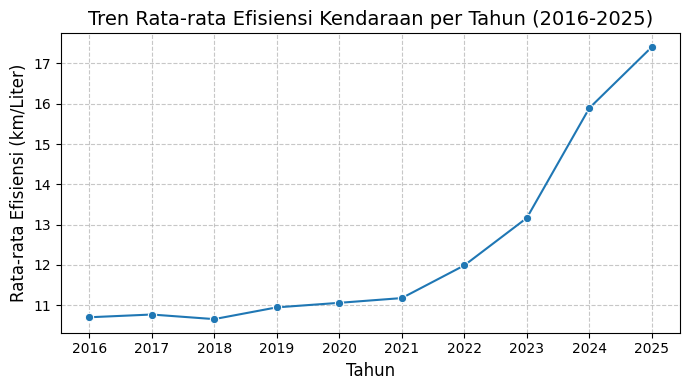

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_fuel_cost

df_trend = df.groupby('Year')['Efficiency_km/L'].mean().reset_index()

print("Rata-rata Efisiensi Kendaraan per Tahun (km/Liter):")
print(df_trend)

plt.figure(figsize=(7, 4))

sns.lineplot(data=df_trend, x='Year', y='Efficiency_km/L', marker='o', color='#1f77b4')

plt.title('Tren Rata-rata Efisiensi Kendaraan per Tahun (2016-2025)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Efisiensi (km/Liter)', fontsize=12)

plt.xticks(df_trend['Year'].unique())

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Analisis Tren Harga Minyak Mentah dan Bensin

Rata-rata Harga Minyak Mentah dan Bensin per Tahun:
   Year  Oil_Price_Avg_Yearly_USD  Gasoline_Price_Avg_Yearly_USD_per_Liter
0  2016                 57.718462                                 0.575653
1  2017                 54.468821                                 0.647200
2  2018                 53.539109                                 0.718152
3  2019                 53.119839                                 0.676391
4  2020                 46.464701                                 0.566737
5  2021                 54.487097                                 0.785340
6  2022                 71.038226                                 1.026903
7  2023                 69.775578                                 0.920200
8  2024                 71.173333                                 0.867211
9  2025                 70.037344                                 0.819647


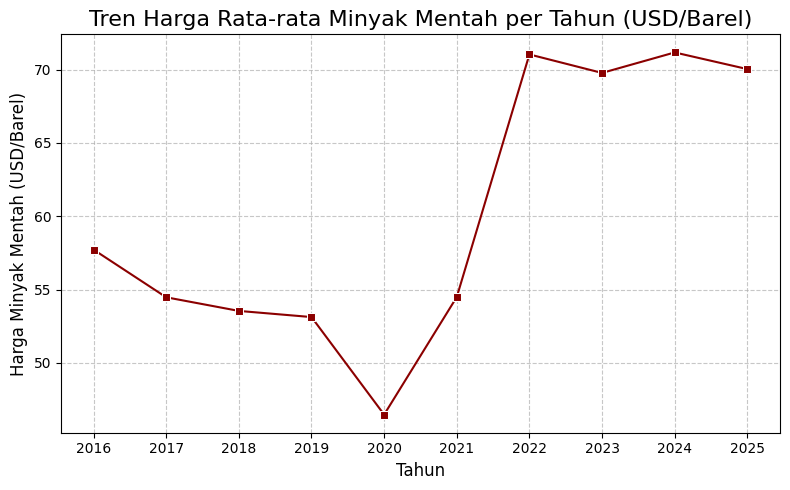

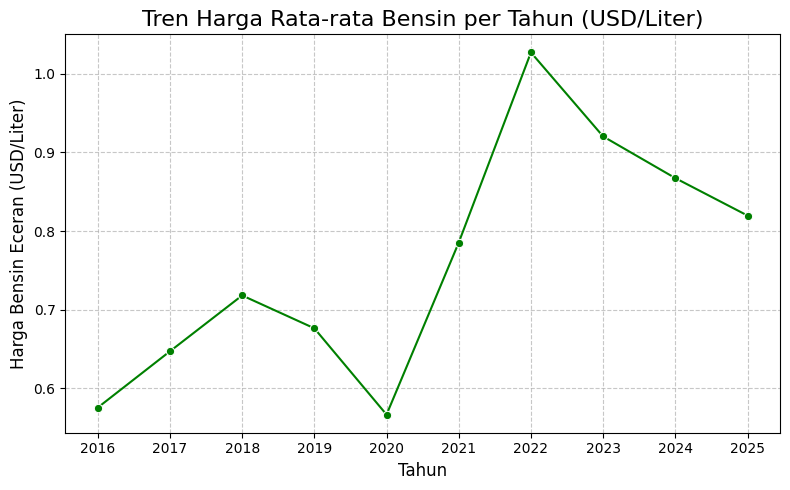

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_fuel_cost

df_price_trend = df[['Year', 'Oil_Price_Avg_Yearly_USD', 'Gasoline_Price_Avg_Yearly_USD_per_Liter']].drop_duplicates(subset=['Year']).sort_values(by='Year').reset_index(drop=True)

print("Rata-rata Harga Minyak Mentah dan Bensin per Tahun:")
print(df_price_trend)

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_price_trend,
    x='Year',
    y='Oil_Price_Avg_Yearly_USD',
    marker='s',
    color='darkred'
)
plt.title('Tren Harga Rata-rata Minyak Mentah per Tahun (USD/Barel)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga Minyak Mentah (USD/Barel)', fontsize=12)
plt.xticks(df_price_trend['Year'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_price_trend,
    x='Year',
    y='Gasoline_Price_Avg_Yearly_USD_per_Liter',
    marker='o',
    color='green'
)
plt.title('Tren Harga Rata-rata Bensin per Tahun (USD/Liter)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Harga Bensin Eceran (USD/Liter)', fontsize=12)
plt.xticks(df_price_trend['Year'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Analisis Harga Mimyak Mentah Terhadap Efisiensi Kendaraan


Data hasil gabung
       Year           make                              model  hpv  \
0      2016          Mazda                                  6    0   
1      2016          Mazda                                  6    0   
2      2016          Mazda                                  6    0   
3      2016            Kia                     Sorento FE AWD    0   
4      2016            Kia                        Sorento FWD    0   
...     ...            ...                                ...  ...   
12996  2025         Toyota                      RAV4 PHEV AWD    0   
12997  2025  Mercedes-Benz          AMG GT 63 S E Performance    0   
12998  2025  Mercedes-Benz  AMG GLC63 S E Performance (coupe)    0   
12999  2025        Porsche                Panamera 4 e-Hybrid   98   
13000  2025        Porsche               Panamera 4S E-Hybrid   98   

       Efficiency_km/L  Oil_Price_Avg_Yearly_USD  
0            12.754311                 57.718462  
1            13.604599                

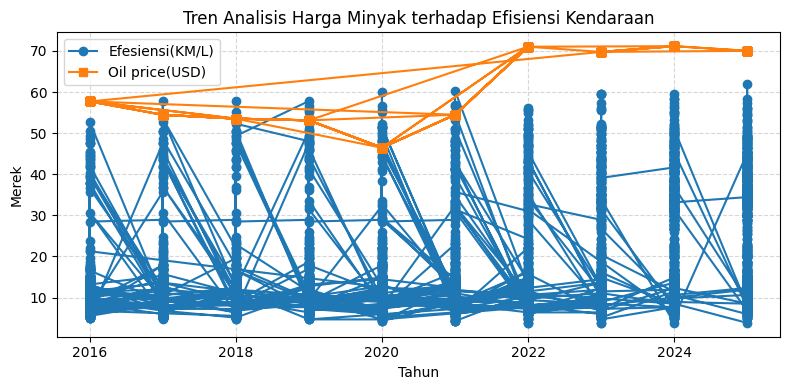


Korelasi harga minyak mentah terhadap efisiensi kendaraan: 0.1923


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_vehicles =  df_kendaraan_clean
df_oil_price = df_minyak_bumi_clean

df_merge = pd.merge(df_vehicles, df_oil_price, on='Year', how='inner')
print("\nData hasil gabung")
print(df_merge)

plt.figure(figsize=(8, 4))
plt.plot(df_merge['Year'], df_merge['Efficiency_km/L'], marker='o', label='Efesiensi(KM/L)')
plt.plot(df_merge['Year'], df_merge['Oil_Price_Avg_Yearly_USD'], marker='s', label='Oil price(USD)')

plt.title("Tren Analisis Harga Minyak terhadap Efisiensi Kendaraan")
plt.xlabel("Tahun")
plt.ylabel("Merek")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

core_value = df_merge['Oil_Price_Avg_Yearly_USD'].corr(df_merge['Efficiency_km/L'])
print(f"\nKorelasi harga minyak mentah terhadap efisiensi kendaraan: {core_value:.4f}")

**Perbandingan merek dengan efisiensi**

Top 5 Make dengan rata-rata Efisiensi tertinggi:
        make  Efficiency_km/L
36     Lucid        50.766519
26     Kandi        48.466383
56     Tesla        45.693094
46  Polestar        38.991751
16    Fisker        37.270932


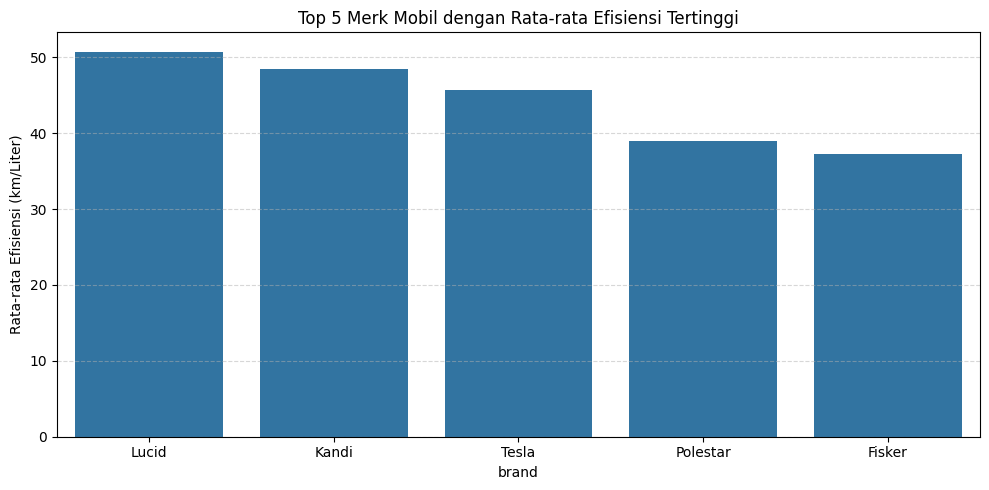

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_brand_consumcy = df_kendaraan_clean
df_periode = df_brand_consumcy[(df_brand_consumcy['Year'] >= 2016) & (df_brand_consumcy['Year'] <= 2025)]

df_brand = (
    df_periode.groupby('make')['Efficiency_km/L']
            .mean()
            .reset_index()
            .sort_values(by='Efficiency_km/L', ascending=False)
)

df_brand

df_top5 = df_brand.head(5)
print("Top 5 Make dengan rata-rata Efisiensi tertinggi:")
print(df_top5)


plt.figure(figsize=(10, 5))
sns.barplot(data=df_top5, x='make', y='Efficiency_km/L')
plt.title('Top 5 Merk Mobil dengan Rata-rata Efisiensi Tertinggi')
plt.xlabel('brand')
plt.ylabel('Rata-rata Efisiensi (km/Liter)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analisis merek yang inefisiensi terhadap efisiensi kendaraan**

Top 5 merek dengan efisiensi km/L terendah:
                 make  Efficiency_km/L
7             Bugatti         4.251437
29         Koenigsegg         4.960010
45             Pagani         5.314296
30        Lamborghini         5.907594
52  Roush Performance         5.952012


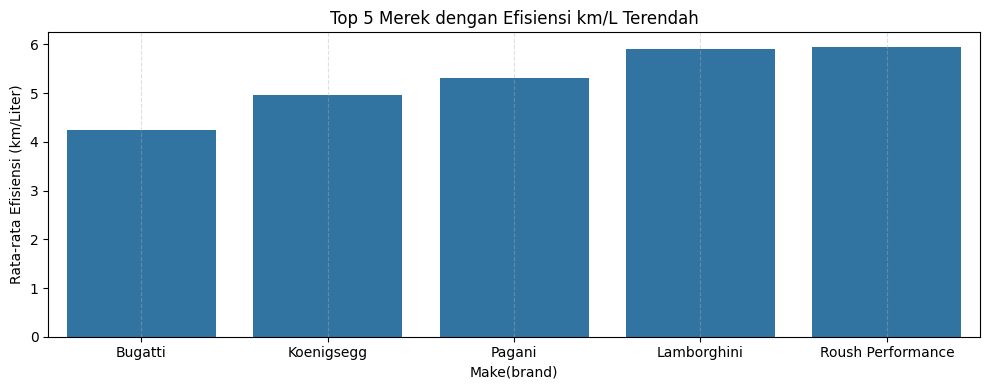

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_inefficient = df_kendaraan_clean
df_period = df_inefficient[(df_inefficient['Year'] >= 2016) & (df_inefficient['Year']) <= 2025].copy()
df_worst_brand = (
    df_period.groupby('make')['Efficiency_km/L']
    .mean()
    .reset_index()
    .sort_values(by='Efficiency_km/L', ascending=True).head(5)
)

df_worst_top5 = df_worst_brand.head(5)
print("Top 5 merek dengan efisiensi km/L terendah:")
print(df_worst_brand)

plt.figure(figsize=(10, 4))
sns.barplot(data=df_worst_brand, x='make', y='Efficiency_km/L')
plt.title("Top 5 Merek dengan Efisiensi km/L Terendah")
plt.xlabel("Make(brand)")
plt.ylabel("Rata-rata Efisiensi (km/Liter)")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()